# Embedding

In [1]:
from gensim.models import Word2Vec
from nltk.corpus import brown, treebank

In [2]:
b = Word2Vec(brown.sents())
t = Word2Vec(treebank.sents())

In [3]:
b.most_similar('trouble', topn=5)

c:\users\harshal patel\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('getting', 0.9197693467140198),
 ('chance', 0.9111344814300537),
 ('money', 0.9073659181594849),
 ('done', 0.9069548845291138),
 ('truth', 0.904726505279541)]

In [4]:
t.most_similar('trouble', topn=5)

c:\users\harshal patel\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('USX', 0.9983331561088562),
 ('her', 0.9982926845550537),
 ('only', 0.9982684254646301),
 ('own', 0.9982447028160095),
 ('department', 0.9982430934906006)]

# Chunking

In [5]:
# Import Library
import nltk

In [6]:
sentence = [("the", "DT"), ("little", "JJ"), ("yellow", "JJ"),
            ("dog", "NN"), ("barked", "VBD"), ("at", "IN"),  
            ("the", "DT"), ("cat", "NN")]

In [7]:
grammar = "NP: {<DT>?<JJ>*<NN>}"   #Define Regular Expression
cp = nltk.RegexpParser(grammar)    #Parse Regular Expression
result = cp.parse(sentence)        #Parse the Sentence in Grammar
print(result)
#result.draw()

(S
  (NP the/DT little/JJ yellow/JJ dog/NN)
  barked/VBD
  at/IN
  (NP the/DT cat/NN))


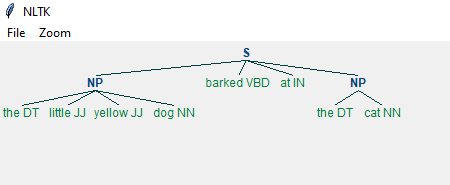

In [8]:
grammar1 = "VP: {<PRP>+<VB>+<JJ>?}"    #Define Regular Expression
cp1 = nltk.RegexpParser(grammar1)      #Parse Regular Expression
result1 = cp1.parse(sentence)          #Parse the Sentence in Grammar
print(result1)
#result1.draw()

(S the/DT little/JJ yellow/JJ dog/NN barked/VBD at/IN the/DT cat/NN)


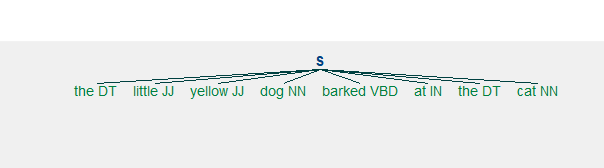

In [9]:
doc = '''Dhoni also holds numerous captaincy records such as 
            the most wins by an Indian captain in ODIs and T20Is 
            and most back-to-back wins by an Indian captain in ODIs.'''

In [10]:
grammar = "NP: {<DT>?<NN.*>+}"
cp = nltk.RegexpParser(grammar)
tokens = nltk.word_tokenize(doc)
pos_tags = nltk.pos_tag(tokens)
print(pos_tags)

[('Dhoni', 'NNP'), ('also', 'RB'), ('holds', 'VBZ'), ('numerous', 'JJ'), ('captaincy', 'NN'), ('records', 'NNS'), ('such', 'JJ'), ('as', 'IN'), ('the', 'DT'), ('most', 'RBS'), ('wins', 'NNS'), ('by', 'IN'), ('an', 'DT'), ('Indian', 'JJ'), ('captain', 'NN'), ('in', 'IN'), ('ODIs', 'NNP'), ('and', 'CC'), ('T20Is', 'NNP'), ('and', 'CC'), ('most', 'JJS'), ('back-to-back', 'JJ'), ('wins', 'NNS'), ('by', 'IN'), ('an', 'DT'), ('Indian', 'JJ'), ('captain', 'NN'), ('in', 'IN'), ('ODIs', 'NNP'), ('.', '.')]


In [11]:
result_lor = cp.parse(pos_tags)
print(result_lor)
#result_lor.draw()

(S
  (NP Dhoni/NNP)
  also/RB
  holds/VBZ
  numerous/JJ
  (NP captaincy/NN records/NNS)
  such/JJ
  as/IN
  the/DT
  most/RBS
  (NP wins/NNS)
  by/IN
  an/DT
  Indian/JJ
  (NP captain/NN)
  in/IN
  (NP ODIs/NNP)
  and/CC
  (NP T20Is/NNP)
  and/CC
  most/JJS
  back-to-back/JJ
  (NP wins/NNS)
  by/IN
  an/DT
  Indian/JJ
  (NP captain/NN)
  in/IN
  (NP ODIs/NNP)
  ./.)


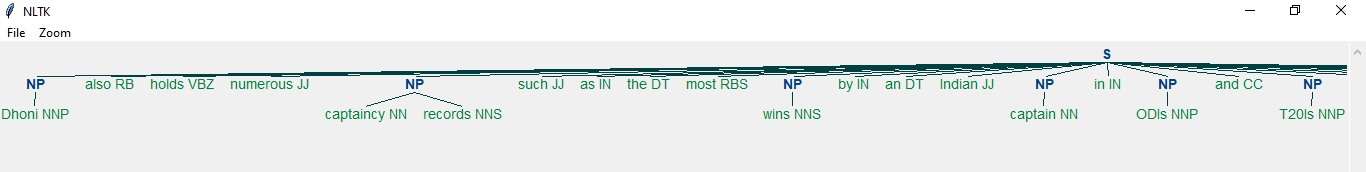

In [12]:
chunks = nltk.ne_chunk(pos_tags)
print(chunks)
chunks.draw()

(S
  (GPE Dhoni/NNP)
  also/RB
  holds/VBZ
  numerous/JJ
  captaincy/NN
  records/NNS
  such/JJ
  as/IN
  the/DT
  most/RBS
  wins/NNS
  by/IN
  an/DT
  (GPE Indian/JJ)
  captain/NN
  in/IN
  (ORGANIZATION ODIs/NNP)
  and/CC
  (PERSON T20Is/NNP)
  and/CC
  most/JJS
  back-to-back/JJ
  wins/NNS
  by/IN
  an/DT
  (GPE Indian/JJ)
  captain/NN
  in/IN
  (ORGANIZATION ODIs/NNP)
  ./.)


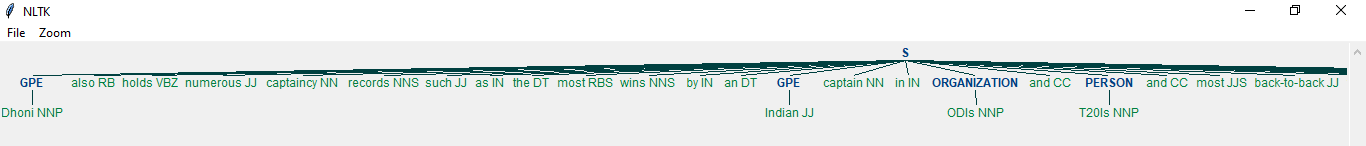

# Named Entity Recognition

In [13]:
article = '''Infosys is going to acquire Simplus, a salesforce consulting company with offices across the US and Australia. 
The IT company informed the stock exchanges late on Monday that it will pay up to $250 million for the deal.'''

In [14]:
# NER using NLTK

tokens = nltk.word_tokenize(article)
pos_tags = nltk.pos_tag(tokens)
chunks = nltk.ne_chunk(pos_tags)
print(chunks)

(S
  (GPE Infosys/NNP)
  is/VBZ
  going/VBG
  to/TO
  acquire/VB
  (PERSON Simplus/NNP)
  ,/,
  a/DT
  salesforce/NN
  consulting/VBG
  company/NN
  with/IN
  offices/NNS
  across/IN
  the/DT
  (ORGANIZATION US/NNP)
  and/CC
  (GPE Australia/NNP)
  ./.
  The/DT
  IT/NNP
  company/NN
  informed/VBD
  the/DT
  stock/NN
  exchanges/NNS
  late/RB
  on/IN
  Monday/NNP
  that/IN
  it/PRP
  will/MD
  pay/VB
  up/RP
  to/TO
  $/$
  250/CD
  million/CD
  for/IN
  the/DT
  deal/NN
  ./.)


In [15]:
# NER using SPACY

import spacy
from spacy import displacy
nlp = spacy.load("en_core_web_sm")

In [16]:
doc = nlp(article)

labels = set([w.label_ for w in doc.ents]) 
for label in labels: 
    entities = [e.string for e in doc.ents if label==e.label_] 
    entities = list(set(entities)) 
    print( label,entities)
    
displacy.render(doc, style="ent")

MONEY ['up to $250 million ']
ORG ['Simplus']
DATE ['Monday ']
GPE ['US ', 'Australia']
